# Exploratory data analysis of the wine quality dataset

## Summary of the dataset

The dataset for this project is sourced from [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/) and specifically [Wine Quality](https://archive-beta.ics.uci.edu/ml/datasets/wine+quality). It was created by Cortez, Paulo, Cerdeira, A., Almeida, F., Matos, T. & Reis, J.. (2009). Wine Quality. UCI Machine Learning Repository.

The link includes two datasets for red and white wine. The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009]. Each row in the datasets represent a wine, and there are 6497 observations in total. There are 12 features in the combined dataset, and we will use these features to classify the quality of the wine. There are 7 different categories of quality in the dataset. The classes are ordered but not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, there are some outliers in the dataset, but there is no missing value. 

In [1]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
white = pd.read_csv("../data/raw/winequality-white.csv")
white['type'] = 'white'
white['quality'] = white['quality'].map(str)

In [3]:
white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol quality   type  
0         8.8       6  white  
1         9.5       6  white  
2        10.1       6  white  
3         9.9       6  white  
4         9.9       6  white  
...       ...     ...    ...  
4893     11.2       6  white  
4894      9.6       5  white  
4895      9.4       6  white  
4896     12.8       7  white  
4897     11.8       6  white  

[4898 rows x 13 columns]

In [4]:
red = pd.read_csv("../data/raw/winequality-red.csv")
red['type'] = 'red'
red['quality'] = red['quality'].map(str)

In [5]:
data = pd.concat((white, red))
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality   type  
0         8.8       6  white  
1         9.5       6  white  
2        10.1       6  white  
3         9.9       6  white  
4         9.9       6  white  
...       ...     ...    ...  
1594     10.5       5    red  
1595     11.2       6    red  
1596     11.0       6    red  
1597     10.2       5    red  
1598     11.0       6    red  

[6497 rows x 13 columns]

Table1. Combined Dataset

# Partitioning the data set into training and test sets

Before going further, we split the data into training and testing portions. The training portion includes 70% of the observations and the testing portion includes the remaining of the data. 

In [6]:
train_df, test_df = train_test_split(data, test_size=0.3, random_state=123)

There is a class imbalance in the dataset. As shown in Table2, wines with quality scores of 5 and 6 which are the normal kinds of wine have the largest counts, while wine with quality scores of 3 and 9 take quite small proportions. We plan to address the class imbalance by balancing the classes or using performance metrics (confusion matrix, recall, precision and f1-score) for addressing class imbalance and pick one of them.

In [7]:
counts = pd.DataFrame(train_df["quality"].value_counts()).reset_index()
counts.columns = ["Quality score", "Counts"]
counts.sort_values(by="Quality score").set_index(counts.columns[0])

Counts
Quality score        
3                  22
4                 157
5                1514
6                1969
7                 756
8                 126
9                   3

Table2. Counts of Observations for Each Class in the Training Dataset

## Exploratory analysis on the training data set

Through aggregation (Table3), we observe that there is some difference in terms of the mean and standard deviation of each feature for each class. This dictates the necessity to perform some preprocessing on the data.

In [8]:
summary = train_df.groupby("quality").agg(["mean", "std"]).round(2)
summary

fixed acidity       volatile acidity       citric acid        \
                 mean   std             mean   std        mean   std   
quality                                                                
3                8.00  1.70             0.56  0.34        0.28  0.19   
4                7.31  1.27             0.46  0.23        0.27  0.18   
5                7.33  1.26             0.39  0.18        0.31  0.16   
6                7.19  1.32             0.32  0.15        0.32  0.14   
7                7.18  1.41             0.29  0.12        0.34  0.11   
8                6.88  1.15             0.30  0.12        0.33  0.10   
9                7.13  0.25             0.29  0.06        0.40  0.08   

        residual sugar       chlorides        ... total sulfur dioxide  \
                  mean   std      mean   std  ...                 mean   
quality                                       ...                        
3                 4.46  4.60      0.08  0.07  ...               123.14   
4                 4.11  3.88      0.06  0.05  ...               104.77   
5                 5.80  4.96      0.06  0.04  ...               121.02   
6                 5.56  4.91      0.05  0.03  ...               115.45   
7                 4.75  4.04      0.05  0.02  ...               109.66   
8                 5.19  3.83      0.04  0.02  ...               118.46   
9                 2.80  1.22      0.03  0.01  ...               123.67   

                density         pH       sulphates       alcohol        
            std    mean  std  mean   std      mean   std    mean   std  
quality                                                                 
3        124.83    1.00  0.0  3.25  0.22      0.51  0.11   10.11  1.04  
4         62.64    0.99  0.0  3.23  0.19      0.52  0.18   10.16  1.00  
5         61.67    1.00  0.0  3.21  0.16      0.53  0.14    9.83  0.81  
6         55.27    0.99  0.0  3.22  0.16      0.53  0.15   10.59  1.13  
7         47.99    0.99  0.0  3.22  0.16      0.55  0.16   11.39  1.21  
8         40.06    0.99  0.0  3.22  0.16      0.51  0.15   11.72  1.28  
9         13.61    0.99  0.0  3.31  0.05      0.42  0.06   12.70  0.20  

[7 rows x 22 columns]

Table3. Summary of Statistics for each Feature

Figure1 shows the overall distribution of the wine quality, and it reinforces the idea that there is class imbalance.

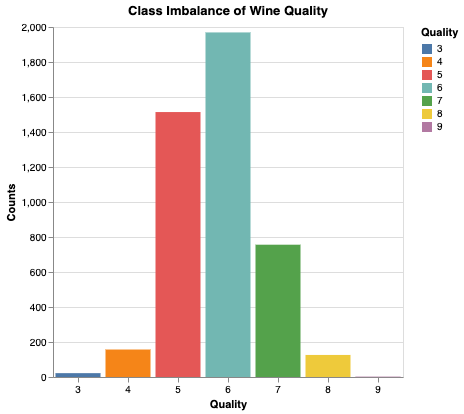

In [9]:
alt.Chart(train_df, title="Class Imbalance of Wine Quality").mark_bar().encode(
    alt.X("quality", title="Quality", axis=alt.Axis(labelAngle=0)),
    alt.Y("count()", title="Counts"),
    alt.Color("quality", title="Quality"),
).properties(width=350, height=350)

Figure1. Class Imbalance of Wine Quality

Figure2 shows the overlay of distribution of the white and red wine in the training data, where we can see that examples of white wines are much more than those of red wines.

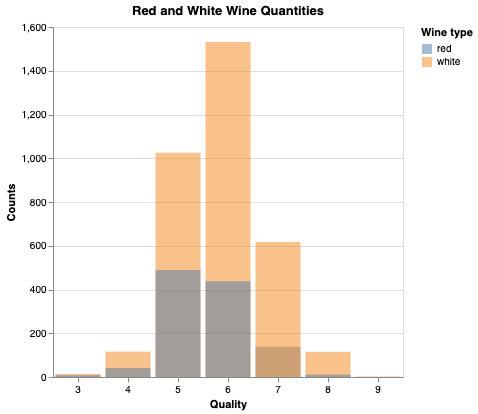

In [10]:
alt.Chart(train_df, title="Red and White Wine Quantities").mark_bar(opacity=0.5).encode(
    alt.X("quality", title="Quality", axis=alt.Axis(labelAngle=0)),
    alt.Y("count()", title="Counts", stack=False),
    alt.Color("type", title="Wine type"),
).properties(width=350, height=350)

Figure2. Red and White Wine Quantities

To find the relevant features we plot the distribution of each feature in the training set and color them by the quality of the wine in Figure3. Here we are looking for the features which have their subplots showing clear distinction among wine quality categories, and these features will potentially be the important ones which help us predict on qualities. Alcohol, volatile acidity, residual sugar, total sulfur dioxide and density turn out to be the candidates of our interest. However, we also see there are a lot of outliers that drag each distribution right skewed, and this will possibly be of our concern during model training.

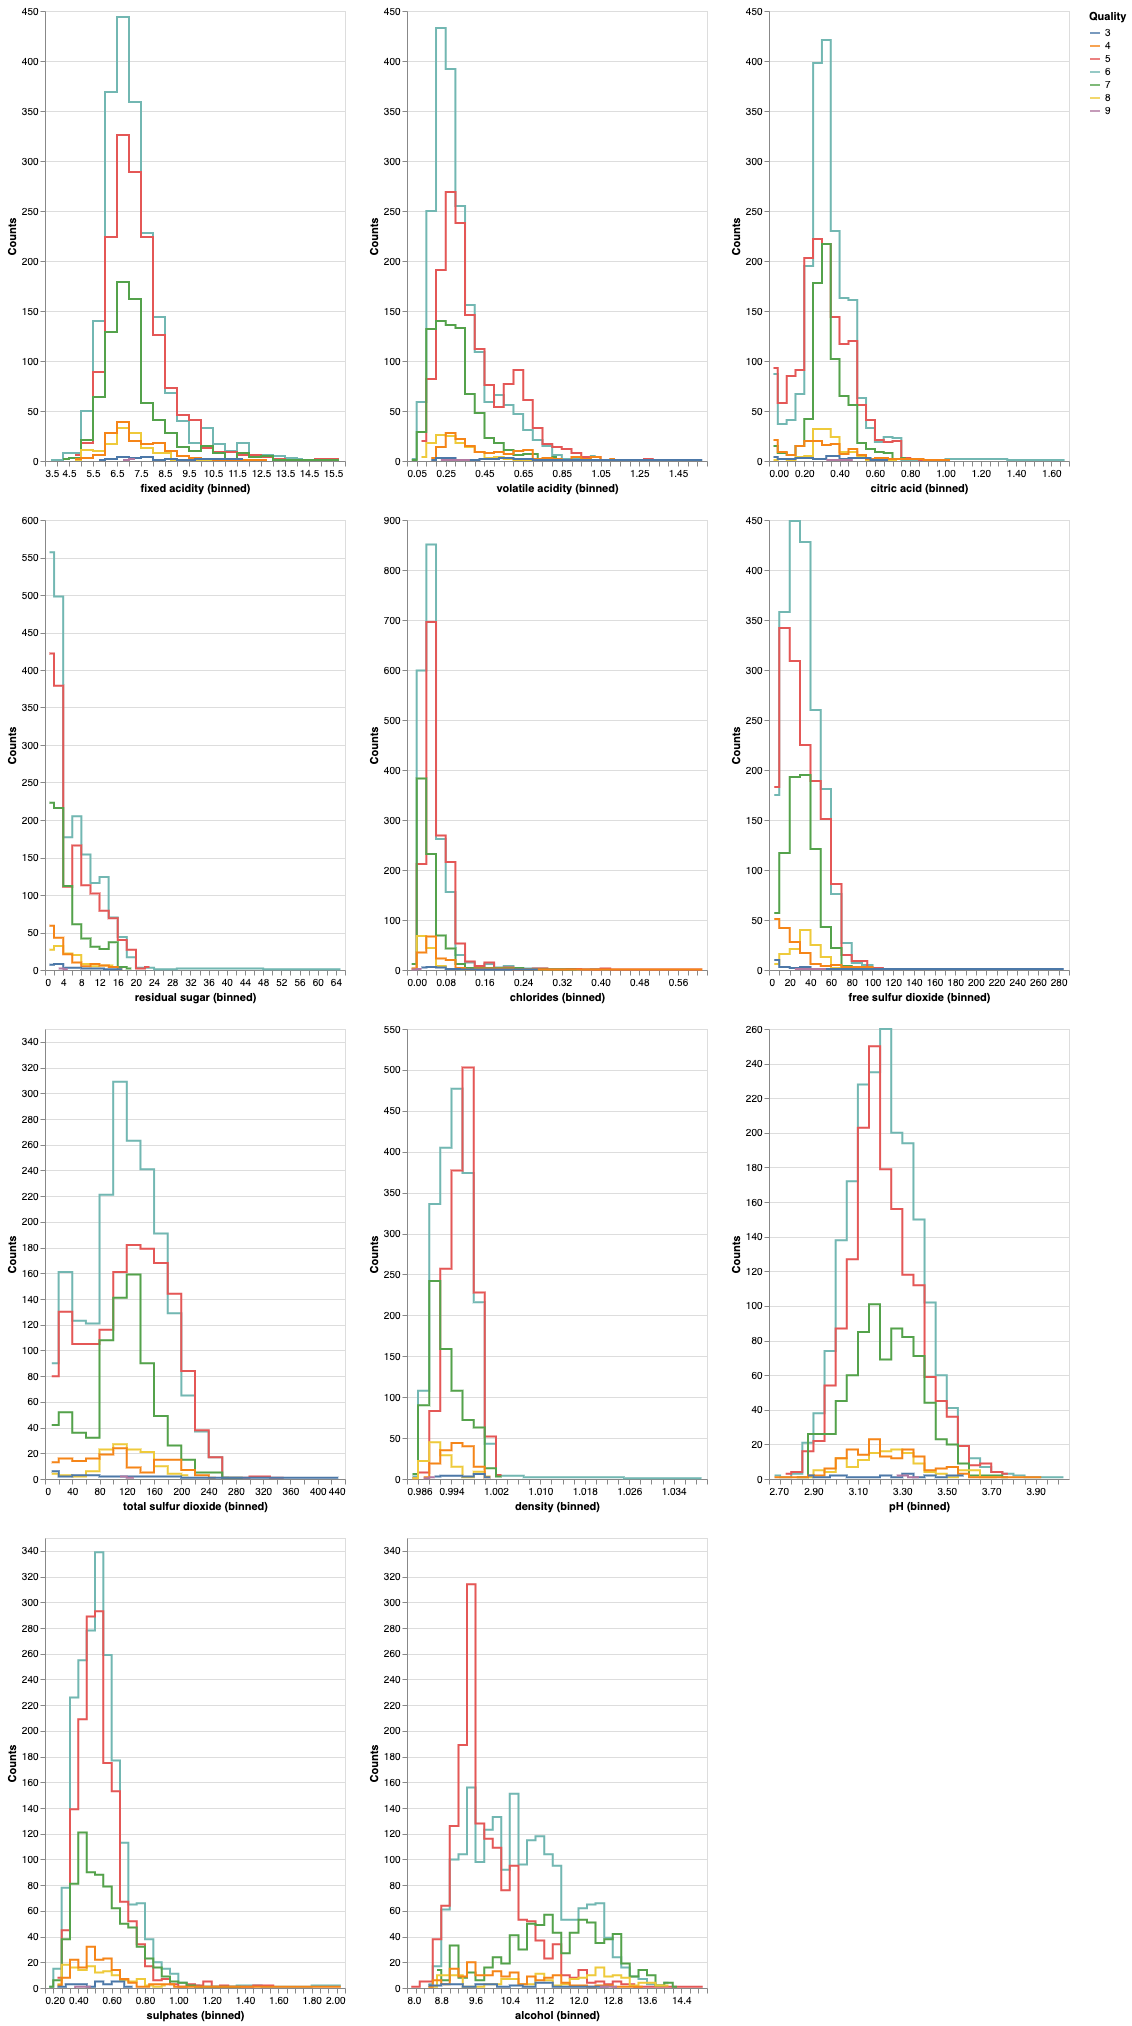

In [11]:
alt.Chart(train_df).mark_line(interpolate="step").encode(
    alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=40)),
    alt.Y("count()", title="Counts"),
    alt.Color("quality", title="Quality"),
).properties(width=300, height=450).repeat(
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
    ],
    columns=3,
)

Figure3. Distribution of Each Feature Colored by Wine Quality

Next, we want to explore more on the relationship between variables. In Figure4, the correlation for all numeric features and wine quality is plotted. We observe that several feature have strong correlation; for example, `total sulfur dioxide` and `free sulfur dioxide` are strongly positively correlated, and `alcohol` and `density` are strongly negatively correlated. Additionally, similar to Figure3, the high correlation between the target `quality` and some features (_i.e._ `alcohol`, `density`, `chlorides`, `volatile acidity`) imply that these features might be important for prediction.

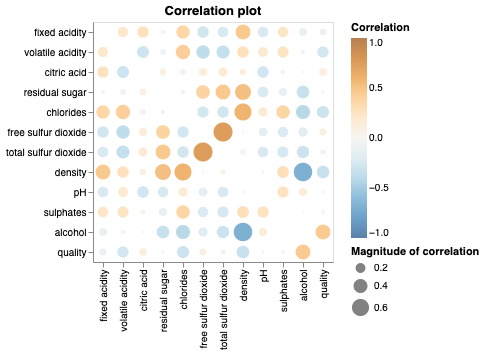

In [12]:
train_df["quality"] = train_df["quality"].map(int)
corr_df = train_df.select_dtypes('number').corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df['abs'] = corr_df['corr'].abs()

variable_order = train_df.select_dtypes('number').columns.to_list()

alt.Chart(corr_df, title="Correlation plot").mark_circle().encode(
    x=alt.X('level_0', title="", sort=variable_order),
    y=alt.Y('level_1', title="", sort=variable_order),
    size=alt.Size('abs', title="Magnitude of correlation"),
    color=alt.Color('corr', 
                    scale=alt.Scale(scheme='blueorange', domain=(-1, 1)),
                    title="Correlation",
                   ))

Figure4. Correlation between All Numeric Variables (including the target Wine Quality)

# References

Cortez, Paulo, Cerdeira, A., Almeida, F., Matos, T. & Reis, J.. (2009). Wine Quality. UCI Machine Learning Repository. [Wine Quality](https://archive-beta.ics.uci.edu/ml/datasets/wine+quality)